# Analisis Descriptivo de los Datos

## El Conjunto de Datos

El conjunto de datos contiene información de alquiler de bicicletas de 2011 y 2012 en el sistema Capital bikeshare, además de información relevante adicional como el clima. 
Este conjunto de datos es de Fanaee-T y Gama (2013) y está alojado en el Depósito de aprendizaje automático de UCI.

### Archivos

- hour.csv : recuento de bicicletas compartidas agregadas por hora. Registros: 17379 horas
- day.csv: recuento de bicicletas compartidas agregadas diariamente. Registros: 731 días

Tanto hour.csv como day.csv tienen los siguientes campos, excepto hr que no está disponible en day.csv

### Caracteristicas del conjunto de datos

- instant: índice de registro
- dteday: fecha
- season: temporada (1: springer, 2: verano, 3: otoño, 4: invierno)
- yr: año (0: 2011, 1: 2012)
- mnth: mes (1 a 12)
- hr: hora (0 a 23)
- holiday: el día del clima es feriado o no (extraído de http://dchr.dc.gov/page/holiday-schedule)
- weekday: día de la semana
- workingday: si el día no es fin de semana ni feriado es 1, de lo contrario es 0.
+ weathersit:
  - 1: despejado, pocas nubes, parcialmente nublado, parcialmente nublado
  - 2: Niebla + Nublado, Niebla + Nubes rotas, Niebla + Pocas nubes, Niebla
  - 3: nieve ligera, lluvia ligera + tormenta eléctrica + nubes dispersas, lluvia ligera + nubes dispersas
  - 4: lluvia intensa + paletas de hielo + tormenta eléctrica + niebla, nieve + niebla
- temp: temperatura normalizada en grados Celsius. Los valores se dividen en 41 (máx.)
- atemp: temperatura de sensación normalizada en grados Celsius. Los valores se dividen en 50 (máx.)
- hum: humedad normalizada. Los valores se dividen en 100 (máx.)
- windspeed: velocidad del viento normalizada. Los valores se dividen en 67 (máx.)
- casual: recuento de usuarios ocasionales
- registered: recuento de usuarios registrados
- cnt: recuento del total de bicicletas de alquiler, incluidas las casuales y las registradas

## Análisis exploratorio y preprocesamiento

El primer paso es realizar un pequeño análisis exploratorio del dataset, cargando los datos, que se almacenan en el archivo hour.csv.

In [26]:
# importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from math import sqrt


# cargamos el dataset a un Dataframe de Pandas
data = pd.read_csv("day.csv")

# Observamos el formato del conjunto de datos. Mostramos las 5 primeras filas del dataset
data.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Identificamos la cantidad de registros. Tamaño de la muestra
print("Cantidad de filas: %d, Cantidad de columnas: %d" % (len(data), len(data.columns)))

Cantidad de filas: 731, Cantidad de columnas: 16


In [4]:
# Controlando valores nulos
data.isnull().any().any()

# Varificamos datos faltantes
total_null = data.isna().sum().sort_values(ascending=False)
percent = (data.isna().sum()/data.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent], axis=1, keys=['Total', 'Percent'])

print(missing_data)



            Total  Percent
cnt             0      0.0
registered      0      0.0
casual          0      0.0
windspeed       0      0.0
hum             0      0.0
atemp           0      0.0
temp            0      0.0
weathersit      0      0.0
workingday      0      0.0
weekday         0      0.0
holiday         0      0.0
mnth            0      0.0
yr              0      0.0
season          0      0.0
dteday          0      0.0
instant         0      0.0


Como podemos ver, el método nos devuelve el valor "False", lo que indica que no existen valores nulos en nuestro dataset.

In [5]:
# Verificamos si existen datos duplicados
data.duplicated().value_counts()
print(data.duplicated().value_counts())
data['duplicated'] = data.duplicated() # Creamos una nueva caracteristica
data

False    731
dtype: int64


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,duplicated
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,False
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,False
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,False
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,False
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,False
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,False
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,False
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,False


In [6]:
# Agrupamos las columnas por tipo de datos
tipos = data.columns.to_series().groupby(data.dtypes).groups

# Armamos una lista de columnas categóricas
ctext = tipos[np.dtype('object')]
len(ctext)  # cantidad de columnas con datos categóricos.

1

In [7]:
# Armamos una lista de columnas numéricas
columnas = data.columns  # lista de todas las columnas
cnum = list(set(columnas) - set(ctext))
len(cnum)

16

In [8]:
# Obtenemos el tipo de dato por cada columna
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
duplicated       bool
dtype: object

Para el tratamiento de datos se debe de tener en cuenta el tipo de variables que presenta el dataframe, en este caso existen variables numéricas o cuantitativas y variables categóricas. El conjunto de variables categóricas lo forman las variables de datetime, season y weather, mientras que el resto son variables cuantitativas. Cabe destacar que las variables “holiday” y “workingday” son variables de clasificación, con valores 0 y 1, pero que no pueden ser tratadas como variables categóricas ni complementarias a falta del registro de que días son fines de semana, por lo que se le tratará como variable cuantitativa. Para las variables cuantitativas realizamos un análisis estadístico a partir del comando dt.describe()‟, en el cual se muestra el número de muestras, el valore medio, la desviación típica, el valor mínimo y máximo, y los distintos percentiles para cada variable cuantitativa:

In [9]:
# Valores estadísticos de las variables cuantitativas
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Centrándonos en las variables cuantitativas a predecir en el algoritmo de aprendizaje
automático, son las variables registered, casual y count. Esta última está formada por la suma
de los usuarios registrados (registered) y casuales (casual) por fecha y hora del registro. Para
conocer el número exacto de usuarios de cada variable, se desarrolla los siguientes códigos: 

In [10]:
# Usuarios Registrados
usuarios_registrados = data.registered.sum()
print(usuarios_registrados)
# Causales
causales = data.casual.sum()
print(causales)
# Número de los distintos tipos de usuarios
total_usuarios = data.registered.sum() + data.casual.sum()
print(total_usuarios)

2672662
620017
3292679


## Selección de características

- Algunas de las columnas contienen información duplicada. Por ejemplo, la columna cnt que queremos predecir es igual a la suma de las columnas casual + registered. Eliminaremos las columnas casual y registered de los datos para asegurarnos de que no las usemos para predecir cnt. 
- dteday: Podríamos mantener esta columna, pero está bien representado por las otras columnas relacionadas con las columnas season, yr, mnth, y weekday. Lo descartaremos.
- instant: esta es una columna inútil para nosotros. La descartaremos

In [11]:
# obtenemos un dataset preprocesado
data = data.drop(columns=['dteday','instant','casual','registered'])

## Selección y evaluación del modelo

Tras el pre-procesado de los datos y teniendo los datos en el formato adecuado, podemos comenzar a trabajar con los modelos.

In [12]:
# Separamos la variable predictora y debajo la variable objetivo.
X=data.drop(['cnt'],axis=1)
Y=data['cnt']

# Utilizamos la instrucción de train_test_split para dividir los datos en un conjunto de prueba y entrenamiento.
# Creamos la muestra de entrenamiento y de test, tanto para predictores como para la variable objetivo, siendo test el 20%
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [13]:
# Decision Tree

# inicializar el Decision Tree.
regressor = DecisionTreeRegressor(random_state = 0)  
# Entrenamos el modelo
regressor.fit(X_train, y_train) 
# Realizamos una predicción junto a los datos de pruebas que separamos previamente.
y_predicted_dt = regressor.predict(X_test)

Se comienza con la definición de los modelos de entrenamiento basados en el algoritmo Random Forest de parámetros:
- N_estimators: es el número de árboles que componen al bosque, en nuestro modelo se establece el valor de 300 árboles, siguiendo el criterio de la amplitud de datos del modelo.

A continuación se entrenan los modelos de ajustes para cada conjunto de datos según las variables dependientes definidas en este modelo:

In [14]:
# Random Forest

# inicializar el Random Forest.
rf = RandomForestRegressor(random_state=0, n_estimators=300)
# Entrenamos el modelo
rf.fit(X_train,y_train);
# Realizamos una predicción junto a los datos de pruebas que separamos previamente.
y_predicted_rf = rf.predict(X_test)


## Resultados

En este apartado se procede a realizar los distintos procedimientos de puntuación para cada algoritmo.
coeficiente de determinación, error cuadrático medio, Raíz del error cuadrático medio

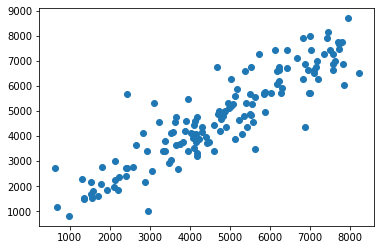

0.8086171414593404 0.8970061306745941
680703.9387755102 366325.0358685563
825.0478402950403 605.247912733746
595.2176870748299 437.7463718820862


In [30]:
# Verificamos como es el modelo utilizando las métricas

# Decision Tree
r_2 = r2_score(y_test, y_predicted_dt)
mse = mean_squared_error(y_test, y_predicted_dt)
# El RMSE es la raíz cuadrada de lo que devuelve la función mean_squared_error.
rmse = sqrt(mean_squared_error(y_test, y_predicted_dt))
mae = mean_absolute_error(y_test, y_predicted_dt)

# Random Forest

r_2_1 = r2_score(y_test, y_predicted_rf)
mse1 = mean_squared_error(y_test, y_predicted_rf)
rmse1 = sqrt(mean_squared_error(y_test, y_predicted_rf))
mae1 = mean_absolute_error(y_test, y_predicted_rf)
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted_dt)
plt.show()
print(r_2, r_2_1)
print(mse, mse1)
print(rmse, rmse1)
print(mae, mae1)



En este apartado se comparan los resultados obtenidos en la aplicación de los distintos algoritmos a los procedimientos de métricas.

In [22]:
print('Modelo\t\tError Cuadrático Medio\tR² score\t\tRaíz del Error Cuadrático Medio')
print('----------------------------------------------------------------------------------------')
print('Decision Tree' + ':\t', str(mean_squared_error(y_test, y_predicted_dt)), '\t', '\t', str(sqrt(mean_squared_error(y_test, y_predicted_dt))), str(r2_score(y_test, y_predicted_dt)))
print('Random Forest' + ':\t', str(mean_squared_error(y_test, y_predicted_rf)), '\t', str(r2_score(y_test, y_predicted_rf)), '\t', str(sqrt(mean_squared_error(y_test, y_predicted_rf))))


Modelo		Error Cuadrático Medio	R² score		Raíz del Error Cuadrático Medio
----------------------------------------------------------------------------------------
Decision Tree:	 680703.9387755102 	 0.8086171414593404 	 825.0478402950403
Random Forest:	 366325.0358685563 	 0.8970061306745941 	 605.247912733746


Para la métrica de coeficiente de determinación, el mejor resultado se consigue con el modelo de RandomForest, dado que se acerca mas a 1.0.
El valor de la metrica de coeficiente de determinación nos indica que el valor se aproxima a 1, por tanto es el mejor ajuste.

## Algoritmo de Clasificación

Repite el ejercicio haciendo el siguiente grupo y desarrollando un algoritmo de clasificación: grupo 1 si cnt<=20, grupo 2 en otro caso.

In [31]:
#Importamos desde sklearn.ensamble, el algoritmo de Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics

# cargamos el dataset a un Dataframe de Pandas
new_data = pd.read_csv("day.csv")
#data = new_data[new_data['cnt'] <= 20]
#data
# el grupo con cnt <= 20 no contiene datos, por tal razón trabajaremos con el grupo > 20

# obtenemos un dataset preprocesado
new_data = new_data.drop(columns=['dteday','instant','casual','registered'])

#Indicamos las variables predictoras y debajo la variable objetivo.
predictors = new_data.drop(['cnt'],axis=1)
targets = new_data['cnt']

#Creamos la muestra de entrenamiento y de test, tanto para predictores como para la variable objetivo, siendo test el 40%
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.2)

#Inicializamos el algoritmo Random Forest e indicamos el número de árboles que vamos a construir
classifier=RandomForestClassifier(n_estimators=100)

#Construimos el modelo sobre los datos de entrenamiento
classifier=classifier.fit(pred_train,tar_train)

#Construimos el modelo sobre los datos de entrenamiento
classifier=classifier.fit(pred_train,tar_train)

#Predecimos para los valores del grupo Test
predictions=classifier.predict(pred_test)

#Pedimos la matriz de confusión de las predicciones del grupo Test. La diagonal de esta matriz se lee: arriba a la izda True Negatives y abajo a la dcha True Positives. 
matrix = sklearn.metrics.confusion_matrix(tar_test,predictions)

#Sacamos el índice Accuracy Score, que resume la Matriz de Confusión y la cantidad de aciertos.
model_accuracy = sklearn.metrics.accuracy_score(tar_test, predictions)

print(matrix)
print (model_accuracy)

#Para obtener la importancia de cada variable inicializamos el  ExtraTreesClassifier
model = ExtraTreesClassifier()

#Ajustamos el modelo
model.fit(pred_train,tar_train)

#Pedimos la matriz de confusión de las predicciones del grupo Test. La diagonal de esta matriz se lee: arriba a la izda True Negatives y abajo a la dcha True Positives. 
matrix = sklearn.metrics.confusion_matrix(tar_test,predictions)

#Sacamos el índice Accuracy Score, que resume la Matriz de Confusión y la cantidad de aciertos.
model_accuracy = sklearn.metrics.accuracy_score(tar_test, predictions)

print(matrix)
print (model_accuracy)

#------Decision Tree Classifier()---------#

#Iniciamos el clasificador del arbol de decisión
clf = DecisionTreeClassifier(random_state=0)

#Entrenamos 
clf_train = clf.fit(pred_train, tar_train)
#Entrenamos 
clf_train = clf.fit(pred_train, tar_train)
#Entrenamos 
clf_train = clf.fit(pred_train, tar_train)

treePredictions= clf_train.predict(pred_test)

#Pedimos la matriz de confusión de las predicciones del grupo Test. La diagonal de esta matriz se lee: arriba a la izda True Negatives y abajo a la dcha True Positives. 
matrix_tree = sklearn.metrics.confusion_matrix(tar_test,treePredictions)

#Sacamos el índice Accuracy Score, que resume la Matriz de Confusión y la cantidad de aciertos.
model_accuracy_tree = sklearn.metrics.accuracy_score(tar_test, treePredictions)

#cross_val_score(clf, predictors, targets, cv=2)
print (model_accuracy_tree)
print (matrix_tree)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0.0
0.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
